In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('exchange-rate-twi.csv')
data.head()

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2


In [3]:
data.columns = ['Month','Exchange Rate TWI']
data = data.set_index('Month')
data.head(12)

,Exchange Rate TWI
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2
6,99.2
7,99.2
8,99.3
9,100.0


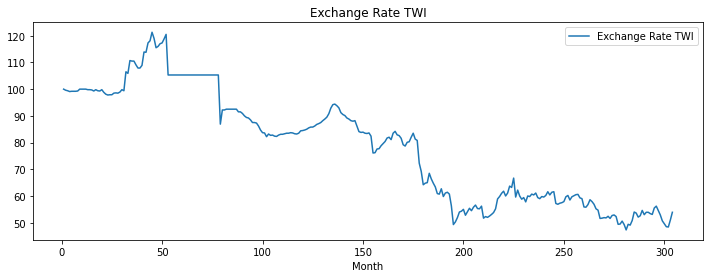

In [4]:
data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Exchange Rate TWI')
plt.show(block=False)

In [5]:
train_len = 212
train = data[:train_len]
test = data[train_len:]

In [6]:
y_hat_naive = test.copy()
y_hat_naive['Naive Forecast'] = train['Exchange Rate TWI'][train_len-1]

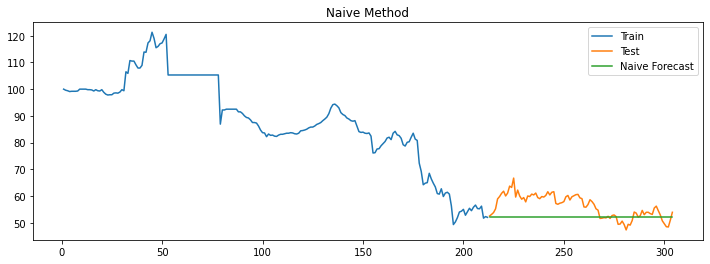

In [7]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label='Train')
plt.plot(test['Exchange Rate TWI'], label ='Test')
plt.plot(y_hat_naive['Naive Forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_naive['Naive Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_naive['Naive Forecast'])/test['Exchange Rate TWI']))
results = pd.DataFrame({'Method':['Naive Method'], 'MAPE':[mape], 'RMSE':[rmse]})
results = results[['Method','RMSE','MAPE']]

In [9]:
results

,Method,RMSE,MAPE
0,Naive Method,5.78,0.0


In [10]:
y_hat_avg = test.copy()
y_hat_avg['Avg ForeCast']= train['Exchange Rate TWI'].mean()

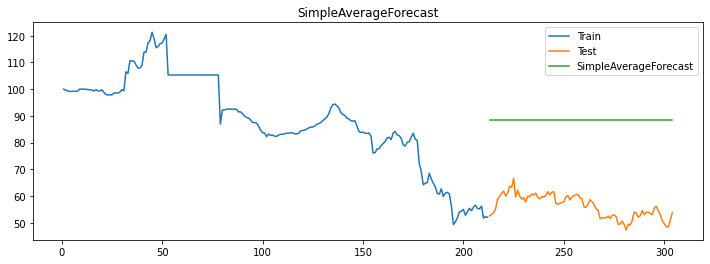

In [11]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label ='Train')
plt.plot(test['Exchange Rate TWI'], label ='Test' )
plt.plot(y_hat_avg['Avg ForeCast'], label = 'SimpleAverageForecast')
plt.legend(loc='best')
plt.title('SimpleAverageForecast')
plt.show()

In [12]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_avg['Avg ForeCast'])).round(2)

mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_avg['Avg ForeCast'])/test['Exchange Rate TWI'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Average Method'], 'RMSE':[rmse], 'MAPE':[mape]})
result = pd.concat([results,tempResults])

result


,Method,RMSE,MAPE
0,Naive Method,5.78,0.00
0,Simple Average Method,32.42,58.12


In [19]:
y_hat_sma = data.copy()
ma_window = 6
y_hat_sma['sma_forecast'] = data ['Exchange Rate TWI'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

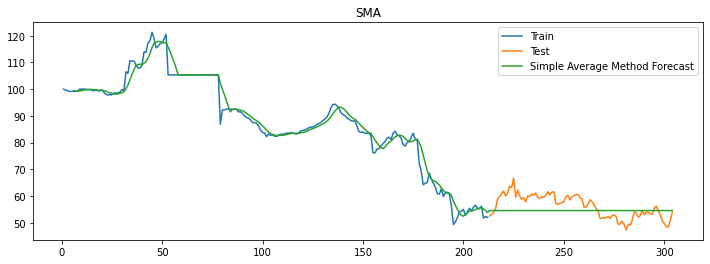

In [20]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label = "Train")
plt.plot(test['Exchange Rate TWI'], label = "Test")
plt.plot(y_hat_sma['sma_forecast'], label = 'Simple Average Method Forecast')
plt.legend(loc='best')
plt.title("SMA")
plt.show()

In [21]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_sma['Exchange Rate TWI'][train_len:])/test['Exchange Rate TWI'])*100,2)
tempResults = pd.DataFrame({"Method":["SMA"], "RMSE":[rmse], "MAPE":[mape]})
results = pd.concat([result, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,5.78,0.00
0,Simple Average Method,32.42,58.12
0,SMA,4.58,0.00
